<a href="https://colab.research.google.com/github/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/aula02_CBPF_AstroInfo_CatalogLegacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 3 - Professor: Clécio R De Bom


# Legacy: Catalog manipulation


This notebook will illustrate the basics of catalog manipulation, which contains the of data Legacy.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Pre-requirements

Download the file catalog from page 

https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0

In [1]:
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1"
!ls

--2022-11-01 18:08:05--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2022-11-01 18:08:06--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc666e651fbc0eae4a66c1e3cc67.dl.dropboxusercontent.com/cd/0/get/Bv9NzSLexTHk2udolrvsx2tS_O9z3u4me4v6Ugh_8FYLgRMGho3AvqWolu7YmRGJA9X5x50z3s_yMKh0koyahRkXSIdDlBYNOEYcyo96LoXpDPUMXQHHxL_ySLFqzbnMooinW23S0KWKKnEatmqSWj_zK0ZiLyEoK7Av3faVF9i2Ng/file?dl=1# [following]
--2022-11-01 18:08:06--  https://uc666e651fbc0eae4a66c1e3cc67.dl.dropboxusercontent.com/cd/0/get/Bv9NzSLexTHk2udolrvsx2tS_O9z3u4me4v6Ugh_8FYLgRMGho3

## Import necessary packages

In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn
import os # ver 'https://docs.python.org/3/library/os.html', para ler ou escrever num arquivo, manipular paths etc.


# Open catalog from fits table using astropy package

In [3]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols = cat_table.columns
print(cat_table)
print(cols)

        ra                dec         ...        z_spec       training
------------------ ------------------ ... ------------------- --------
219.08289517954503  34.62503563674176 ...               -99.0      0.0
  219.018686653907  34.62537369835652 ...               -99.0      0.0
 218.9763831277981 34.626465741964694 ... 0.20600000023841858      1.0
218.92461988134852  34.62559613136096 ...               -99.0      0.0
219.10422528282172  34.62584794653823 ...               -99.0      0.0
 219.1401551191026  34.63060062779776 ...               -99.0      0.0
219.07940419061788   34.6265108832743 ...               -99.0      0.0
218.95238017111876  34.62802154931848 ...               -99.0      0.0
  219.106935147277  34.62930367862053 ...               -99.0      0.0
 218.8540579148524 34.629540769545564 ...               -99.0      0.0
               ...                ... ...                 ...      ...
221.40034030049185   35.0263478059078 ...               -99.0      0.0
221.21

# Constructing Pandas DataFrame from Table fits

In [4]:
df = cat_table.to_pandas()
df
#print(df)

,ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,...,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4,z,zErr,zmin,zmax,z_spec,training
0,219.082895,34.625036,22.280201,23.840595,20.669277,19.442677,19.876930,16.879316,NaN,0.068069,...,0.030203,0.102416,0.114776,-0.075900,0.778901,0.080700,0.702562,0.863962,-99.000,0.0
1,219.018687,34.625374,20.950979,22.239498,20.180450,19.764698,20.027622,18.840683,NaN,0.020584,...,0.040873,0.118477,0.706567,-0.799649,0.335511,0.054689,0.288449,0.397827,-99.000,0.0
2,218.976383,34.626466,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,...,0.009083,0.029333,-9.551555,-0.682852,0.219682,0.010735,0.209061,0.230530,0.206,1.0
3,218.924620,34.625596,20.606371,21.781631,19.691599,19.006557,19.443335,20.748812,NaN,0.020479,...,0.021253,0.071826,4.317370,-0.843075,0.542923,0.051388,0.485855,0.588631,-99.000,0.0
4,219.104225,34.625848,20.372391,21.050526,20.042389,20.373194,20.973274,19.442488,17.469923,0.018710,...,0.078672,0.304236,1.281699,1.788509,0.227206,0.033312,0.191055,0.257679,-99.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203479,221.384627,35.031304,20.289848,22.006527,19.473064,18.800829,19.199001,22.347729,NaN,0.023790,...,0.017453,0.056976,18.655874,-0.504265,0.399513,0.029692,0.371137,0.430521,-99.000,0.0
203480,221.267106,35.032654,22.278854,24.686527,21.332008,20.327465,21.582365,NaN,15.524459,0.155021,...,0.070509,0.506848,-0.115952,0.318850,0.525794,0.076385,0.445291,0.598062,-99.000,0.0
203481,221.357931,35.031956,21.256090,22.794085,20.244637,18.834969,19.022402,17.893970,16.110783,0.057986,...,0.018522,0.049890,0.324572,0.561515,0.497148,0.061960,0.444781,0.568702,-99.000,0.0
203482,221.140035,35.031835,20.928772,22.810913,19.648155,18.766457,19.179871,NaN,NaN,0.033461,...,0.016835,0.056150,-1.286056,-0.460461,0.561410,0.034761,0.527032,0.596554,-99.000,0.0


# Adding columns to Pandas DataFrame

In [5]:
new_col = "_id" # name of the new column.
df['ra'] = df['ra'].astype(str) # change numbers to string, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html'.
df['dec'] = df['dec'].astype(str) # change numbers to string.
df[new_col] = df['ra'] + df['dec'] # join two columns and adds to dataframe df as the final column.
df
#print(df)

,ra,dec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,...,MAGErr_W2,MAGErr_W3,MAGErr_W4,z,zErr,zmin,zmax,z_spec,training,_id
0,219.08289517954503,34.62503563674176,22.280201,23.840595,20.669277,19.442677,19.876930,16.879316,NaN,0.068069,...,0.102416,0.114776,-0.075900,0.778901,0.080700,0.702562,0.863962,-99.000,0.0,219.0828951795450334.62503563674176
1,219.018686653907,34.62537369835652,20.950979,22.239498,20.180450,19.764698,20.027622,18.840683,NaN,0.020584,...,0.118477,0.706567,-0.799649,0.335511,0.054689,0.288449,0.397827,-99.000,0.0,219.01868665390734.62537369835652
2,218.9763831277981,34.626465741964694,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,...,0.029333,-9.551555,-0.682852,0.219682,0.010735,0.209061,0.230530,0.206,1.0,218.976383127798134.626465741964694
3,218.92461988134852,34.62559613136096,20.606371,21.781631,19.691599,19.006557,19.443335,20.748812,NaN,0.020479,...,0.071826,4.317370,-0.843075,0.542923,0.051388,0.485855,0.588631,-99.000,0.0,218.9246198813485234.62559613136096
4,219.10422528282172,34.62584794653823,20.372391,21.050526,20.042389,20.373194,20.973274,19.442488,17.469923,0.018710,...,0.304236,1.281699,1.788509,0.227206,0.033312,0.191055,0.257679,-99.000,0.0,219.1042252828217234.62584794653823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203479,221.3846269372925,35.03130360684637,20.289848,22.006527,19.473064,18.800829,19.199001,22.347729,NaN,0.023790,...,0.056976,18.655874,-0.504265,0.399513,0.029692,0.371137,0.430521,-99.000,0.0,221.384626937292535.03130360684637
203480,221.26710586697644,35.03265425222566,22.278854,24.686527,21.332008,20.327465,21.582365,NaN,15.524459,0.155021,...,0.506848,-0.115952,0.318850,0.525794,0.076385,0.445291,0.598062,-99.000,0.0,221.2671058669764435.03265425222566
203481,221.35793083937708,35.0319557953791,21.256090,22.794085,20.244637,18.834969,19.022402,17.893970,16.110783,0.057986,...,0.049890,0.324572,0.561515,0.497148,0.061960,0.444781,0.568702,-99.000,0.0,221.3579308393770835.0319557953791
203482,221.14003466677406,35.031834870454304,20.928772,22.810913,19.648155,18.766457,19.179871,NaN,NaN,0.033461,...,0.056150,-1.286056,-0.460461,0.561410,0.034761,0.527032,0.596554,-99.000,0.0,221.1400346667740635.031834870454304


#Splitting in two Dataframe

In [6]:
print("********************************")
print("Dataframe 1")
print("********************************")
df_1 = df.iloc[:, 2:-7] # set mags columns dataframe 1 from dataframe, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html'
# ^^^^^^ df.iloc[:, 2:-7] faz um dataframe novo a partir de todas as rows (:) da terceira coluna (coluna 2) até o fim menos as 7 últimas colunas.
# Ou seja, pega todas as colunas de magnitude e mag_error.
# ver 'https://www.geeksforgeeks.org/python-list-slicing/'
# ver 'https://stackoverflow.com/questions/509211/understanding-slicing'
df_1[new_col] = df[new_col] # insert the ID column from df to the end of df_1.
cols1 = df_1.columns.tolist() # converte pandas dataframe para lista, ver 'https://datatofish.com/convert-pandas-dataframe-to-list/'.
print(cols1)
cols1 = cols1[-1:] + cols1[:-1] # o último item de cols1 vai virar o primeiro item.
# ^^^^^ cols1[-1:] é uma lista com o último item de cols1 e cols1[:-1] pega tudo menos o último item.
print(cols1)
df_1 = df_1[cols1] # troca a ordem das colunas de df_1 de acordo com a lisa cols1, ou seja, a coluna id vai ser a primeira.
print(df_1)

print("********************************")
print("Dataframe 2")
print("********************************")
df_2 = df.iloc[:, -7:-2] # set photoz columns dataframe 1 from dataframe
# ^^^^^ df.iloc[:, -7:-2] pega todas as rows (:) de df das últimas 7 colunas menos as 2 últimas colunas (-7:-2).
# Ou seja, pega as colunas z 	zErr 	zmin 	zmax 	z_spec.
df_2[new_col] = df[new_col] # insert the ID column from df to the end of df_2.
cols2 = df_2.columns.tolist() # faz uma lista com o nome das colunas de df_2.
print(cols2)
cols2 = cols2[-1:] + cols2[:-1] # o último item de cols2 vai virar o primeiro item.
print(cols2)
df_2 = df_2[cols2] # troca a ordem das colunas de df_2 de acordo com a lisa cols2, ou seja, a coluna id vai ser a primeira.
print(df_2)

********************************
Dataframe 1
********************************
['MAG_R', 'MAG_G', 'MAG_Z', 'MAG_W1', 'MAG_W2', 'MAG_W3', 'MAG_W4', 'MAGErr_R', 'MAGErr_G', 'MAGErr_Z', 'MAGErr_W1', 'MAGErr_W2', 'MAGErr_W3', 'MAGErr_W4', '_id']
['_id', 'MAG_R', 'MAG_G', 'MAG_Z', 'MAG_W1', 'MAG_W2', 'MAG_W3', 'MAG_W4', 'MAGErr_R', 'MAGErr_G', 'MAGErr_Z', 'MAGErr_W1', 'MAGErr_W2', 'MAGErr_W3', 'MAGErr_W4']
                                         _id      MAG_R      MAG_G      MAG_Z  \
0        219.0828951795450334.62503563674176  22.280201  23.840595  20.669277   
1          219.01868665390734.62537369835652  20.950979  22.239498  20.180450   
2        218.976383127798134.626465741964694  18.890739  20.205397  18.109526   
3        218.9246198813485234.62559613136096  20.606371  21.781631  19.691599   
4        219.1042252828217234.62584794653823  20.372391  21.050526  20.042389   
...                                      ...        ...        ...        ...   
203479    221.384626937292535

# List Slicing:

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
start = 2
stop = 7
step = 1

#The syntax is:

a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array

#There is also the step value, which can be used with any of the above:

a[start:stop:step] # start through not past stop, by step

#The key point to remember is that the :stop value represents the first value that is not in the selected slice. So, the difference between stop and start is the number of elements selected (if step is 1, the default).

#The other feature is that start or stop may be a negative number, which means it counts from the end of the array instead of the beginning. So:

a[-1]    # last item in the array
a[-2:]   # last two items in the array
a[:-2]   # everything except the last two items

#Similarly, step may be a negative number:

a[::-1]    # all items in the array, reversed
a[1::-1]   # the first two items, reversed
a[:-3:-1]  # the last two items, reversed
a[-3::-1]  # everything except the last two items, reversed

#Python is kind to the programmer if there are fewer items than you ask for. For example, if you ask for a[:-2] and a only contains one element, you get an empty list instead of an error. Sometimes you would prefer the error, so you have to be aware that this may happen.
#Relationship with the slice object

#A slice object can represent a slicing operation, i.e.:

a[start:stop:step]

#is equivalent to:

a[slice(start, stop, step)]

#Slice objects also behave slightly differently depending on the number of arguments, similarly to range(), i.e. both slice(stop) and slice(start, stop[, step]) are supported. To skip specifying a given argument, one might use None, so that e.g. a[start:] is equivalent to a[slice(start, None)] or a[::-1] is equivalent to a[slice(None, None, -1)].

#While the :-based notation is very helpful for simple slicing, the explicit use of slice() objects simplifies the programmatic generation of slicing.


# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

In [7]:
from google.colab import drive
drive.mount('/content/drive')
DriveSave = '/content/drive/MyDrive' # defines folder to save archives in Google Drive.

Mounted at /content/drive


# Saving New Catalogs with Pandas Dataframe in csv 


(Google Drive)

In [8]:
df_1.to_csv(os.path.join(DriveSave,'LegacyCatalog1.csv'), index=False)
df_2.to_csv(os.path.join(DriveSave,'LegacyCatalog2.csv'), index=False)


# Loading New Catalogs with Pandas Dataframe in csv 

In [9]:
df_1 = pd.read_csv(os.path.join(DriveSave,'LegacyCatalog1.csv')) 
df_2 = pd.read_csv(os.path.join(DriveSave,'LegacyCatalog2.csv')) 

# Using the _id column as a reference, finally we can now perform the join operation

In [10]:
DF_mag = df_1.set_index(new_col) # transforma os itens da coluna id como índices, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html'.
DF = df_2.join(DF_mag, on=new_col) # junta o dataframe df_2 com o dataframe DF_mag a partir dos itens (índices) da coluna id. Ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html'.
print(DF)
print(DF.columns.tolist())

                                         _id         z      zErr      zmin  \
0        219.0828951795450334.62503563674176  0.778901  0.080700  0.702562   
1          219.01868665390734.62537369835652  0.335511  0.054689  0.288449   
2        218.976383127798134.626465741964694  0.219682  0.010735  0.209061   
3        218.9246198813485234.62559613136096  0.542923  0.051388  0.485855   
4        219.1042252828217234.62584794653823  0.227206  0.033312  0.191055   
...                                      ...       ...       ...       ...   
203479    221.384626937292535.03130360684637  0.399513  0.029692  0.371137   
203480   221.2671058669764435.03265425222566  0.525794  0.076385  0.445291   
203481    221.3579308393770835.0319557953791  0.497148  0.061960  0.444781   
203482  221.1400346667740635.031834870454304  0.561410  0.034761  0.527032   
203483  221.3061151788022335.032600651235455  0.670019  0.082765  0.608144   

            zmax  z_spec      MAG_R      MAG_G      MAG_Z     M

# Now save and load new dataframe in table fits

In [12]:
t2 = Table.from_pandas(DF) # transforma o dataframe DF em uma Table do astropy t2, ver 'https://docs.astropy.org/en/stable/table/pandas.html'.
fits_table_filename = os.path.join(DriveSave,'NewLegacyCatalog.fits') # caminho e nome do novo catálogo, fits Table.
hdu = fits.BinTableHDU(data=t2) # Converts the astropy table t2 to a fits binary table HDU, ver 'https://docs.astropy.org/en/stable/io/fits/api/tables.html#astropy.io.fits.BinTableHDU'.
hdu.writeto(fits_table_filename, overwrite=True) # This will write a single HDU to a FITS file without having to manually encapsulate it in an HDUList object first.
# ver 'https://docs.astropy.org/en/stable/io/fits/index.html'.
# ver 'https://docs.astropy.org/en/stable/io/fits/api/hdulists.html'.

# Abrindo o novo catálogo, pegando os dados e transformando-os em uma tabela do astropy:
hdul = fits.open(fits_table_filename, ignore_missing_end=True) 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 1
cat_table = Table(data)
cols=cat_table.columns
print(cat_table)
print(cols)

                _id                          z          ...      MAGErr_W4     
------------------------------------ ------------------ ... -------------------
 219.0828951795450334.62503563674176  0.778901219367981 ... -0.0759001150727272
   219.01868665390734.62537369835652 0.3355111181735992 ... -0.7996485233306885
 218.976383127798134.626465741964694 0.2196822762489318 ... -0.6828519701957703
 218.9246198813485234.62559613136096  0.542923092842102 ... -0.8430752158164978
 219.1042252828217234.62584794653823 0.2272058278322219 ...  1.7885087728500366
  219.140155119102634.63060062779776 0.4622515141963959 ...  -0.840893566608429
  219.0794041906178834.6265108832743 0.7665448784828186 ...  -2.698615789413452
 218.9523801711187634.62802154931848 0.6852128505706787 ...   9.755480766296388
   219.10693514727734.62930367862053 0.4312166571617126 ...  0.9499387741088868
 218.854057914852434.629540769545564 0.2613219022750854 ...  -0.916178584098816
                                 ...    

# Set Dataframe condition (mag R < 20)

In [14]:
DFMAGR20 = DF[DF['MAG_R'] < 20] # Filtering, constrói um data frame novo só com rows em que os objetos de MAG_R sejam menores que 20.
DFMAGR20
#print(DFMAGR20)

,_id,z,zErr,zmin,zmax,z_spec,MAG_R,MAG_G,MAG_Z,MAG_W1,MAG_W2,MAG_W3,MAG_W4,MAGErr_R,MAGErr_G,MAGErr_Z,MAGErr_W1,MAGErr_W2,MAGErr_W3,MAGErr_W4
2,218.976383127798134.626465741964694,0.219682,0.010735,0.209061,0.230530,0.206,18.890739,20.205397,18.109526,18.055065,18.447739,NaN,NaN,0.005011,0.011483,0.003473,0.009083,0.029333,-9.551555,-0.682852
14,219.119427344439634.63266943455789,0.181169,0.014108,0.169253,0.197469,0.186,17.951214,18.725872,17.421986,17.605015,17.894524,16.168297,15.874641,0.003280,0.004822,0.003622,0.006690,0.019365,0.065676,0.428052
27,219.1050832410185834.637306709538635,0.195434,0.034806,0.173423,0.243035,0.185,18.449135,19.666044,17.633009,17.470276,17.832317,17.713089,17.794498,0.003427,0.007174,0.002666,0.005147,0.016315,0.251950,2.410352
28,219.1116303379641334.63846217402524,0.195882,0.010257,0.188277,0.208790,0.186,18.476810,19.731552,17.749542,17.789030,18.210846,NaN,NaN,0.003759,0.008169,0.003112,0.007235,0.024041,-4.193285,-0.575248
30,218.893899457402334.63850522158348,0.383395,0.064554,0.320165,0.449272,0.460,19.982281,20.972868,19.534878,19.232071,19.388649,17.874418,17.888485,0.014081,0.020077,0.014115,0.025581,0.066733,0.304107,2.751483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203438,221.260260333561435.01373075174152,0.400500,0.040343,0.357554,0.438240,-99.000,19.377346,20.826118,18.519417,17.915764,18.270123,17.526314,15.837678,0.015090,0.029334,0.012849,0.009114,0.028403,0.255466,0.456562
203440,221.402609501773135.01676962316078,0.150196,0.035478,0.116340,0.187296,-99.000,19.615913,20.137293,19.226173,19.427559,19.706017,17.626949,15.419001,0.011196,0.010507,0.013815,0.030568,0.090135,0.245604,0.292380
203441,221.403223664121935.01955191933627,0.131958,0.084791,0.035688,0.205270,-99.000,19.537825,19.790167,19.750210,20.510195,20.495277,17.593616,16.825104,0.010099,0.007965,0.021137,0.082668,0.185614,0.234937,1.065051
203450,221.407621549922235.01804876804364,0.508276,0.057083,0.433342,0.547508,-99.000,19.891062,21.301668,18.963003,18.067678,18.550543,18.368502,NaN,0.016293,0.031334,0.013096,0.009188,0.032189,0.501685,-0.575829


# Fit mag R and mag R < 20 using dataframe plot histogram

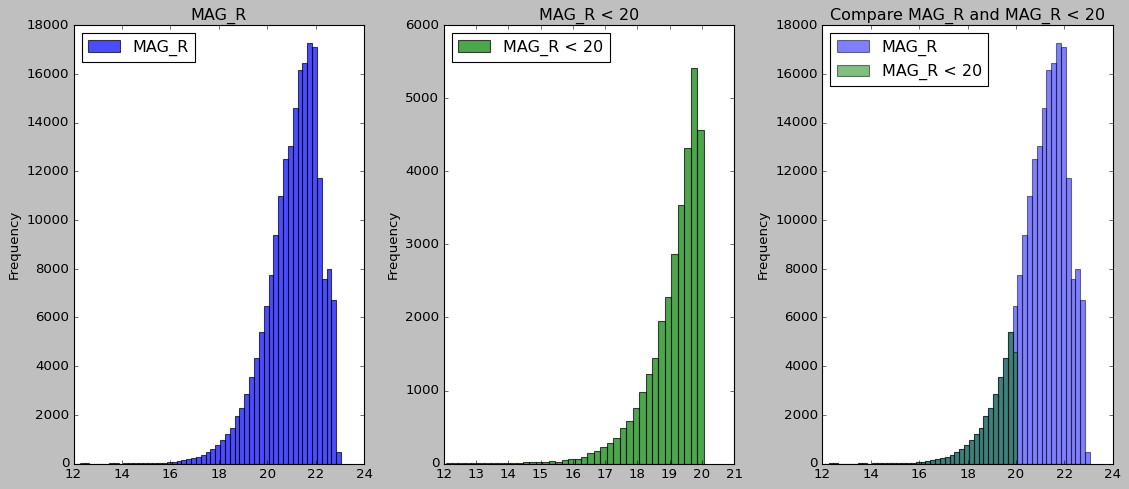

In [15]:
hor = 3
ver = 1

plt.style.use('classic')
# ver 'https://www.geeksforgeeks.org/style-plots-using-matplotlib/'

fig = plt.figure(figsize=(14, 6), constrained_layout=True) # Create a new figure, or activate an existing figure. figsize = Width, height in inches. constrained_layout: The layout mechanism for positioning of plot elements to avoid overlapping.
gs = fig.add_gridspec(ver, hor, left=0.1, right=0.5, wspace=0.1) # A grid layout to place subplots within a figure.


binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize) # Return evenly spaced values within a given interval.


ax = fig.add_subplot(gs[0, 0]) # Adiciona os eixos, ticks, legenda de cada subplot na figure.
bins0 = binarange(DF["MAG_R"], binsize) # Pegou a coluna MAG_R do dataframe DF e fez uma lista de binsize em binsize do valor min ao max dessa coluna.
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.7, label="MAG_R") # pega a coluna MAG_R do dataframe DF e faz um histograma com os bins (intervalos do histograma) definidos por bins0, cor azul e transparencia alpha.
ax.set_title("MAG_R")
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 1])
bins1 = binarange(DFMAGR20["MAG_R"], binsize)
ax = DFMAGR20["MAG_R"].plot.hist(bins=bins1, color='green', alpha=0.7, label="MAG_R < 20")
ax.set_title("MAG_R < 20")
plt.legend(loc='upper left')

ax = fig.add_subplot(gs[0, 2])
ax = DF["MAG_R"].plot.hist(bins=bins0, color='blue', alpha=0.5, label="MAG_R")
ax = DFMAGR20["MAG_R"].plot.hist(bins=bins0, color='green', alpha=0.5, label="MAG_R < 20") # equal bins all mag r
ax.set_title("Compare MAG_R and MAG_R < 20")
plt.legend(loc='upper left')

plt.show
plt.savefig(os.path.join(DriveSave,'PlotsHist_MAGR_Legacy.png')) # Salva a figura no caminho DriveSave com nome PlotsHist_MAGR...

# Saving and Load mag R in file format numpy python (.npy)

In [18]:
np.save(os.path.join(DriveSave,'Array_MAGR.npy'), np.array(DFMAGR20["MAG_R"])) # Save the array np.array(DFMAGR20["MAG_R"]) to a binary file in NumPy .npy format to DriveSave as Array_MAGR.npy.
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.save.html'.
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.array.html'.
MAG_R = np.load(os.path.join(DriveSave,'Array_MAGR.npy')) # Load arrays or pickled objects from .npy, .npz or pickled files.
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.load.html'.

# Fitting with Seaborn mag R < 20 


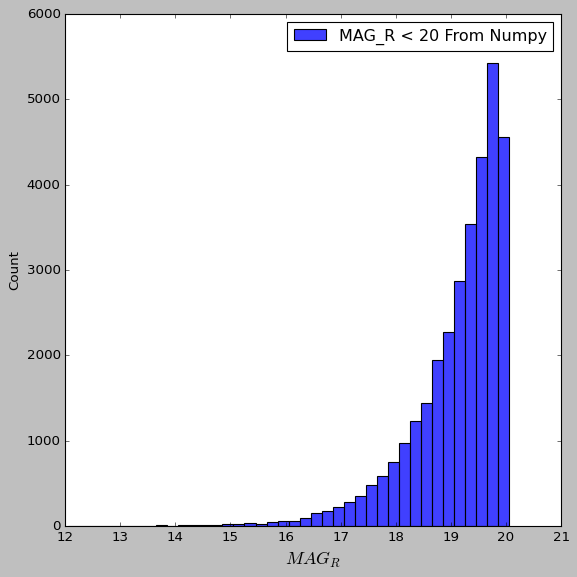

In [20]:
fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(x=MAG_R, bins=bins1, label="MAG_R < 20 From Numpy") # faz o histograma a partir do numpy array MAG_R.
ax.set_xlabel('$MAG_{R}$', fontsize=16)
ax.legend(loc="best")
plt.savefig(os.path.join(DriveSave,'Hist_MAGR20_Legacy.png')) # salvando figura nesse (caminho, nome).

In [21]:
print("######## List files in local google colab:")
!ls 
print("******** List files in your google drive:")
!ls drive/MyDrive/ 


######## List files in local google colab:
drive  legacy_dr8_class.fits  sample_data
******** List files in your google drive:
 Array_MAGR.npy
 artigos_bibliografia.zip
'astronomia e astrofisica.pdf'
'Cálculo Diferencial e Integral de Funções de Várias Variáveis_Diomara Pinto e Maria Cândida F. Morgado_3ªEd.pdf'
 calculo-james-stewart-7-volume-2.pdf
'Carroll B.W., Ostlie D.A. An introduction to modern astrophysics  2007.djvu'
 Classroom
'Colab Notebooks'
 Comprovante_biblioteca.pdf
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão (1).docx'
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão_assinado_Biblioteca.pdf'
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão.docx'
'Cópia de Ata Eduardo da Costa Valadão 2021.2(1).pdf'
'Cópia de Ata Eduardo da Costa Valadão 2021.2.pdf'
'Cópia de Formulário para Defesa de Monografia.docx'
'documento 3.pptx'
 EDUARDOVALADAOCERTIFICADO.pdf
 Experime

# Exercício: Estimate the limiting magnitude of the provided catalog. Use the relation beetween mag_err and S/N